# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div><div class="lev3 toc-item"><a href="#Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:" data-toc-modified-id="Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверить работу реализованного алгоритма с различным числом кластеров:</a></div><div class="lev3 toc-item"><a href="#За-выполнение-ДЗ:" data-toc-modified-id="За-выполнение-ДЗ:-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>За выполнение ДЗ:</a></div>

In [85]:
import numpy as np
import pandas as pd

In [86]:
import matplotlib.pyplot as plt

In [87]:
from sklearn.cluster import KMeans

In [88]:
%matplotlib inline

In [89]:
def clplot(X,labels,title):
    plt.scatter(X[:,0],X[:,1], c = labels, cmap=plt.cm.spectral)
    plt.title(title)
    plt.axis('equal')
    plt.axis('off')

    plt.show()

In [108]:
def cls(X, n_clusters):
    #fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, random_state=0).fit(X)
    clplot(X, kmeans.labels_,'KMeans')
    my_kmeans = my_KMeans(n_clusters=n_clusters, max_iter=300).fit(X)
    clplot(X, my_kmeans.labels_,'my_KMeans')

# Задание:

Реализовать алгоритм кластеризации k-means

In [156]:
class my_KMeans:
    def __init__(self, n_clusters=2, metric='euclidean', max_iter=300, eps = 1e-5):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter
        self.eps = eps

    #@staticmethod
    def distance(self, vector1, vector2):
        '''
        Определяем функцию расстояния
        '''
        if self.metric == 'euclidean':
            return np.sqrt(np.power(vector1-vector2, 2).sum(axis=1))
        elif self.metric == 'Cheb':
            return np.abs(vector1-vector2).max(axis=1)
        elif self.metric == 'manhetten':
            return np.abs(vector1-vector2).sum(axis=1)

    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        return self.step_predict(X, self.centers)
    
    def step_predict(self, X, centers):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        step_predict = np.zeros(X.shape[0])
        for i in range(len(X)):
            '''
            p_min = np.inf
            idx_min = 0
            for idx, center in enumerate(centers):
                po = self.distance(center, X[i])
                if p_min > po:
                    p_min = po
                    idx_min = idx
            step_predict[i] = idx_min
            '''
            step_predict[i] = np.sqrt(np.power(X[i] - centers,2).sum(axis=1)).argmin()
        return step_predict

    def fit(self, X):  
        '''
        Шаг 1 - Инизиализируем начальные положения центров кластеров
        '''
        n_samples, n_features = X.shape
        rand_idx = np.random.permutation(n_samples)[:self.n_clusters]
        centers = X[rand_idx]
        
        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        for step in range(self.max_iter):            
            '''
            Шаг 2.1 - Вычисляем расстояние до центров кластеров
            '''
                        
            '''
            Шаг 2.2 - Для каждого объекта находим argmin от расстояний до центров
            '''
            y_step = self.step_predict(X, centers)
            '''
            Шаг 2.3 - Уточняем положения центров кластеров
            '''
            new_centers = np.zeros(shape=centers.shape)
            for i in range(self.n_clusters):
                idxs = (y_step == i)
                new_centers[i] = X[idxs].sum(axis=0)/idxs.sum()

            diff_centers = self.distance(centers, new_centers).sum()
            if diff_centers <= self.eps:
                print("iteration %d: diff_center %f eps %e" % (step, diff_centers, self.eps))
                break
            
        '''
        Шаг 3 - Сохраняем положения центров кластеров
        ''' 
        self.centers = centers
        
        '''
        Шаг 4 - Возвращяем предсказание
        '''        
        self.labels_ = self.predict(X)
        return self

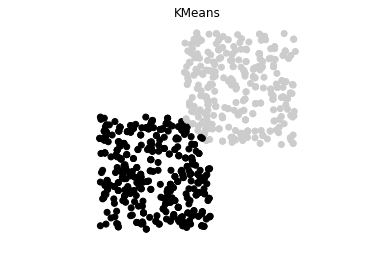

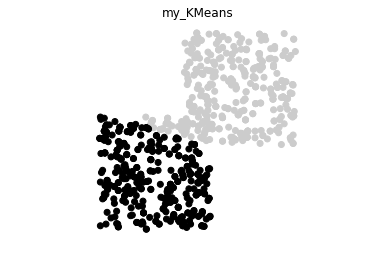

In [153]:
data1 = pd.read_csv("dataset1.csv", sep='\t', header=None)
X = data1.get_values()
cls(X,2)

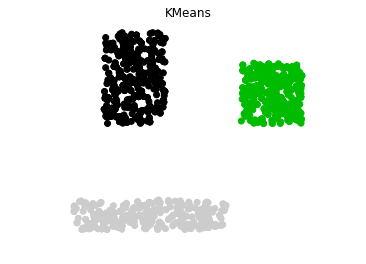

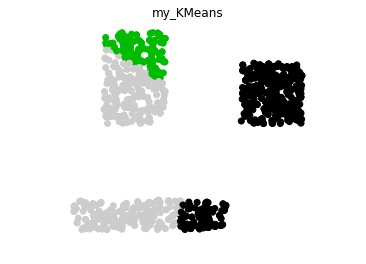

In [154]:
data2 = pd.read_csv("dataset2.csv", sep='\t', header=None)
X = data2.get_values()
data2.head()
cls(X,3)

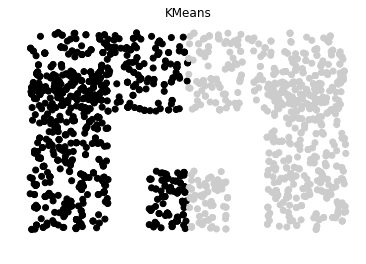

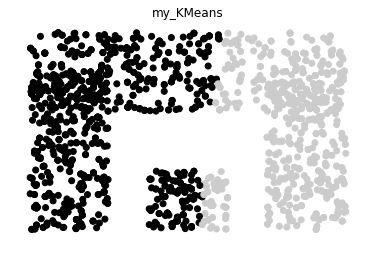

In [155]:
data3 = pd.read_csv("dataset3.csv", sep='\t', header=None)
X = data3.get_values()
data3.head()
cls(X,2)

In [128]:
import matplotlib.image as mpimg
image = mpimg.imread('./mailru.jpg')
data = image.reshape((image.shape[0]*image.shape[1],3))

In [157]:
my_kmeans = my_KMeans(n_clusters=64).fit(data)

C:\Users\my_pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in true_divide


In [178]:
proc_data = my_kmeans.predict(data)
new_image = []
for cluster in proc_data:
    new_image.append(my_kmeans.centers[int(cluster)])

In [179]:
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))

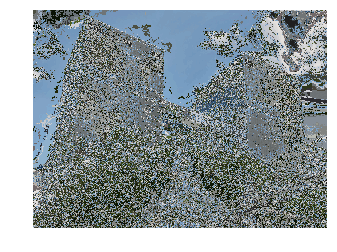

In [180]:
plt.axis("off")
plt.imshow(new_image)
plt.show()

### Проверить работу реализованного алгоритма с различным числом кластеров:
* Для тестовых наборов данных (dataset1, dataset2, dataset3)
* Для задачи кластеризации цветов на изображении (пример в k-means_photo_clusterization)

### За выполнение ДЗ: 
* 6 баллов за реализацию алгоритма
* +2 балла за возможность выбора метрики
    - Евклидово расстояние
    - Расстояние Чебышева
    - Манхэттенское расстояние